# Project Title: Car Price Prediction
## By: Kawuribi Zakaria
## Project Outline 
- Creating a car-price prediction project with a linear regression model 
- Performing an initial exploratory data analysis with Jupyter notebook
- Setting up a validation framework
- Implementing the linear regression model and other regression model 
- Performing feature engineering for the model 
- Keeping the model under control with regularization 
- Using the model to predict car prices

## Project Description
The goal of this project is to build a machine learning model that accurately predicts car prices based on features like make, model, mileage, year, and other factors. The project involves collecting a dataset of car listings with associated prices, preprocessing the data (e.g., handling missing values, encoding categorical variables, and scaling numerical features), and training various machine learning models such as linear regression, decision trees, random forests, and gradient boosting. 

Techniques like cross-validation and hyperparameter tuning will be used to optimize performance, and feature importance analysis will identify key factors influencing car prices. The final model will be deployed in a user-friendly interface for predicting car prices based on input features, with comprehensive documentation provided for all project steps, from data collection to deployment.

## Dataset Description 

### Dataset Url 
- ttps://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge

### Attributes
- ID
- Price: price of the car(Target Column)
- Levy
- Manufacturer
- Model
- Prod. year
- Category
- Leather interior
- Fuel type
- Engine volume
- Mileage
- Cylinders
- Gear box type
- Drive wheels
- Doors
- Wheel
- Color
- Airbags


### Importing and loading the needed libraries and models

In [1]:
## loading and preprocessing data
import numpy as np
import pandas as pd 

## visualization of data
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## splitting our dataset 
from sklearn.model_selection import train_test_split

## loading the learning alg
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#feature engineering
from sklearn.feature_extraction import DictVectorizer

import warnings
warnings.filterwarnings('ignore')
## loading the error metrics
#from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error,mean_squared_error

In [2]:
car_price = pd.read_csv('car_price_datatset.csv')
car_price.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# DATA CLEANING

STEPS TAKEN
1. Make a copy of the dataset
2. Rename columns
3. Remove duplicates
4. drop null values for columns fuel_type, engine_HP, engine_cylinders, number_of_doors
5. Backwards fill for market category
6. Drop "unknown" in transmission type
7. change all float64 to int64 and change year from int64 to object

In [3]:
# 1. Make a copy of the dataset
car1 = car_price.copy()

In [4]:
# consistent naming for column names
car1.columns = car1.columns.str.lower().str.replace(' ', '_')

In [5]:
car1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
car1.duplicated().sum()

np.int64(715)

In [7]:
# 3. Remove duplicates
car1.drop_duplicates(inplace = True)

In [8]:
car1.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3376
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [9]:
# 4. drop null values for columns fuel_type, engine_HP, engine_cylinders, number_of_doors
car1.dropna(subset = ['engine_fuel_type', 'engine_hp', 'engine_cylinders', 'number_of_doors'], inplace = True)

In [10]:
# 5. Backwards fill for market category
car1.market_category.fillna(method = 'bfill', inplace = True)

In [11]:
car1.transmission_type.unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'UNKNOWN',
       'DIRECT_DRIVE'], dtype=object)

In [12]:
# 6. Drop "unknown" in transmission type
car1 = car1[car1.transmission_type != 'UNKNOWN']

In [13]:
# 7. change all float64 to int64 and change year from int64 to object
car1.engine_hp = car1.engine_hp.astype('int64')
car1.engine_cylinders = car1.engine_cylinders.astype('int64')
car1.number_of_doors = car1.number_of_doors.astype('int64')
car1.year = car1.year.astype('object')

# DATA EXPLORATION

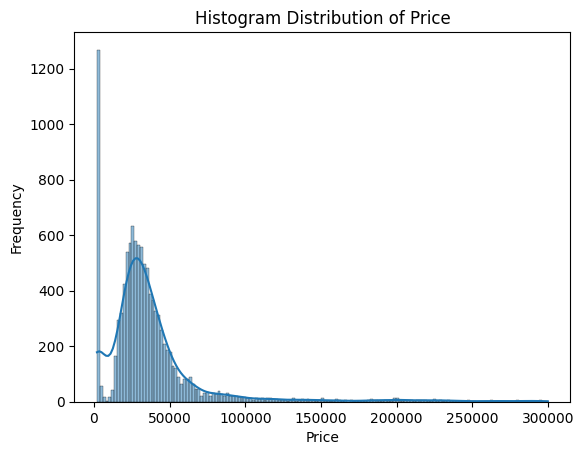

In [14]:
# price distribution
sns.histplot(data = car1[car1.msrp < 300000], x = 'msrp', kde = True)
plt.title('Histogram Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

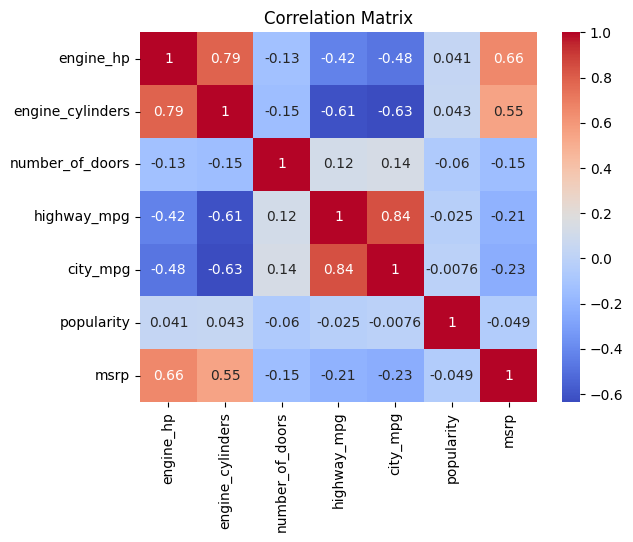

In [15]:
# correlation between numerical variables
car_num = car1.select_dtypes(exclude = [object])
sns.heatmap(car_num.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

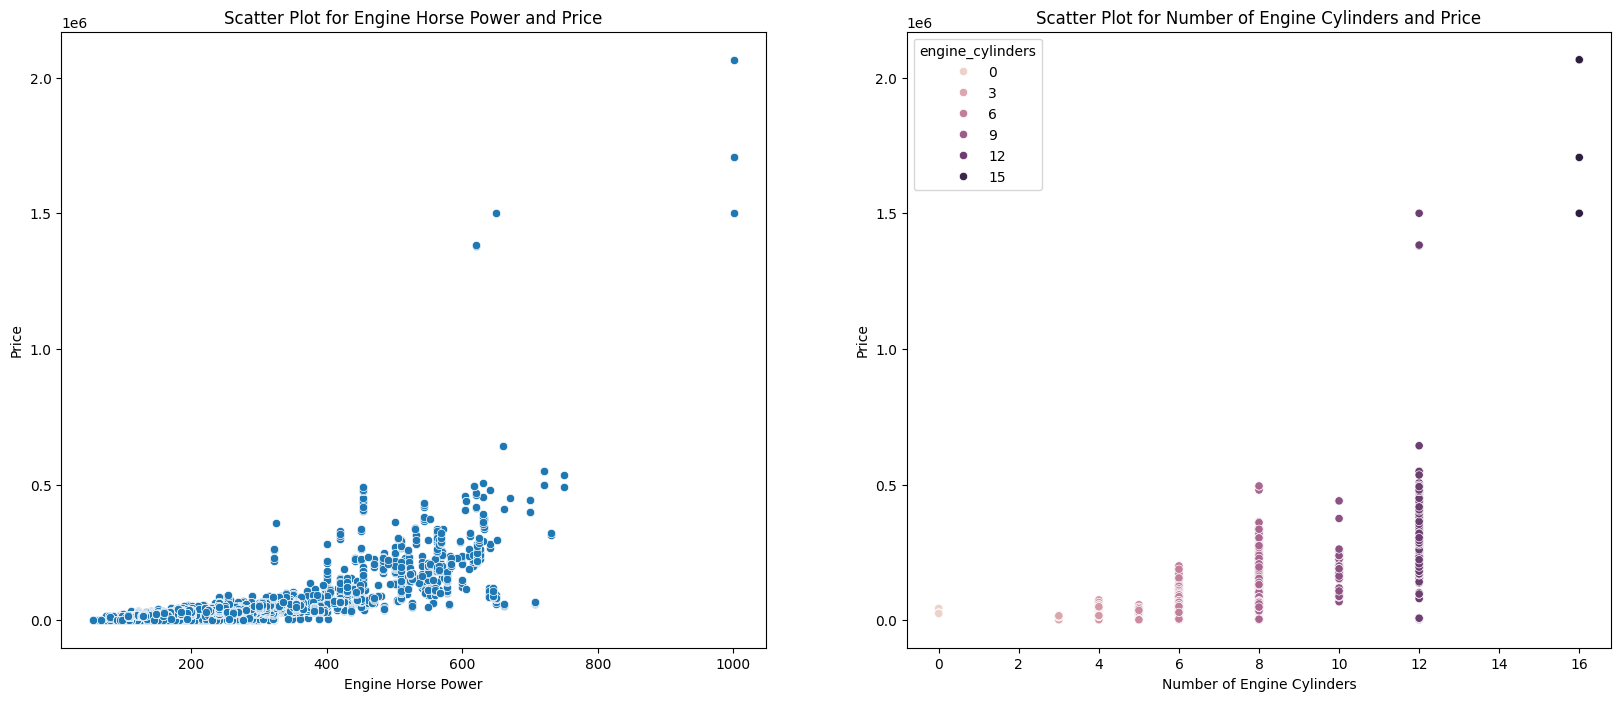

In [16]:
# investigating into the strong positive correlation
plt.figure(figsize = (20, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(data = car1, x = 'engine_hp', y = 'msrp')
plt.title('Scatter Plot for Engine Horse Power and Price')
plt.xlabel('Engine Horse Power')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
sns.scatterplot(data = car1, x = 'engine_cylinders', y = 'msrp', hue = 'engine_cylinders')
plt.title('Scatter Plot for Number of Engine Cylinders and Price')
plt.xlabel('Number of Engine Cylinders')
plt.ylabel('Price')

plt.show()

In [17]:
# Using groupby for categorical and numerical variables
category = car1.select_dtypes(include= 'object').columns

for column in category:
    agg = car1.groupby(column)['msrp'].agg('mean').round(2).sort_values(ascending = False).reset_index()
    print(agg, '\n')

             make        msrp
0         Bugatti  1757223.67
1         Maybach   546221.88
2     Rolls-Royce   351130.65
3     Lamborghini   331567.31
4         Bentley   247169.32
5         McLaren   239805.00
6         Ferrari   237383.82
7          Spyker   214990.00
8    Aston Martin   198123.46
9        Maserati   113684.49
10        Porsche   101622.40
11  Mercedes-Benz    72135.03
12          Lotus    68377.14
13     Land Rover    68067.09
14            BMW    62162.56
15     Alfa Romeo    61600.00
16       Cadillac    56368.27
17           Audi    54574.12
18          Lexus    47549.07
19        Genesis    46616.67
20        Lincoln    43560.01
21       Infiniti    42640.27
22         HUMMER    36464.41
23          Acura    35087.49
24            GMC    32695.74
25          Volvo    29724.68
26          Buick    29034.19
27      Chevrolet    29000.22
28     Volkswagen    28947.37
29         Nissan    28856.42
30         Toyota    28758.77
31           Ford    28522.86
32        

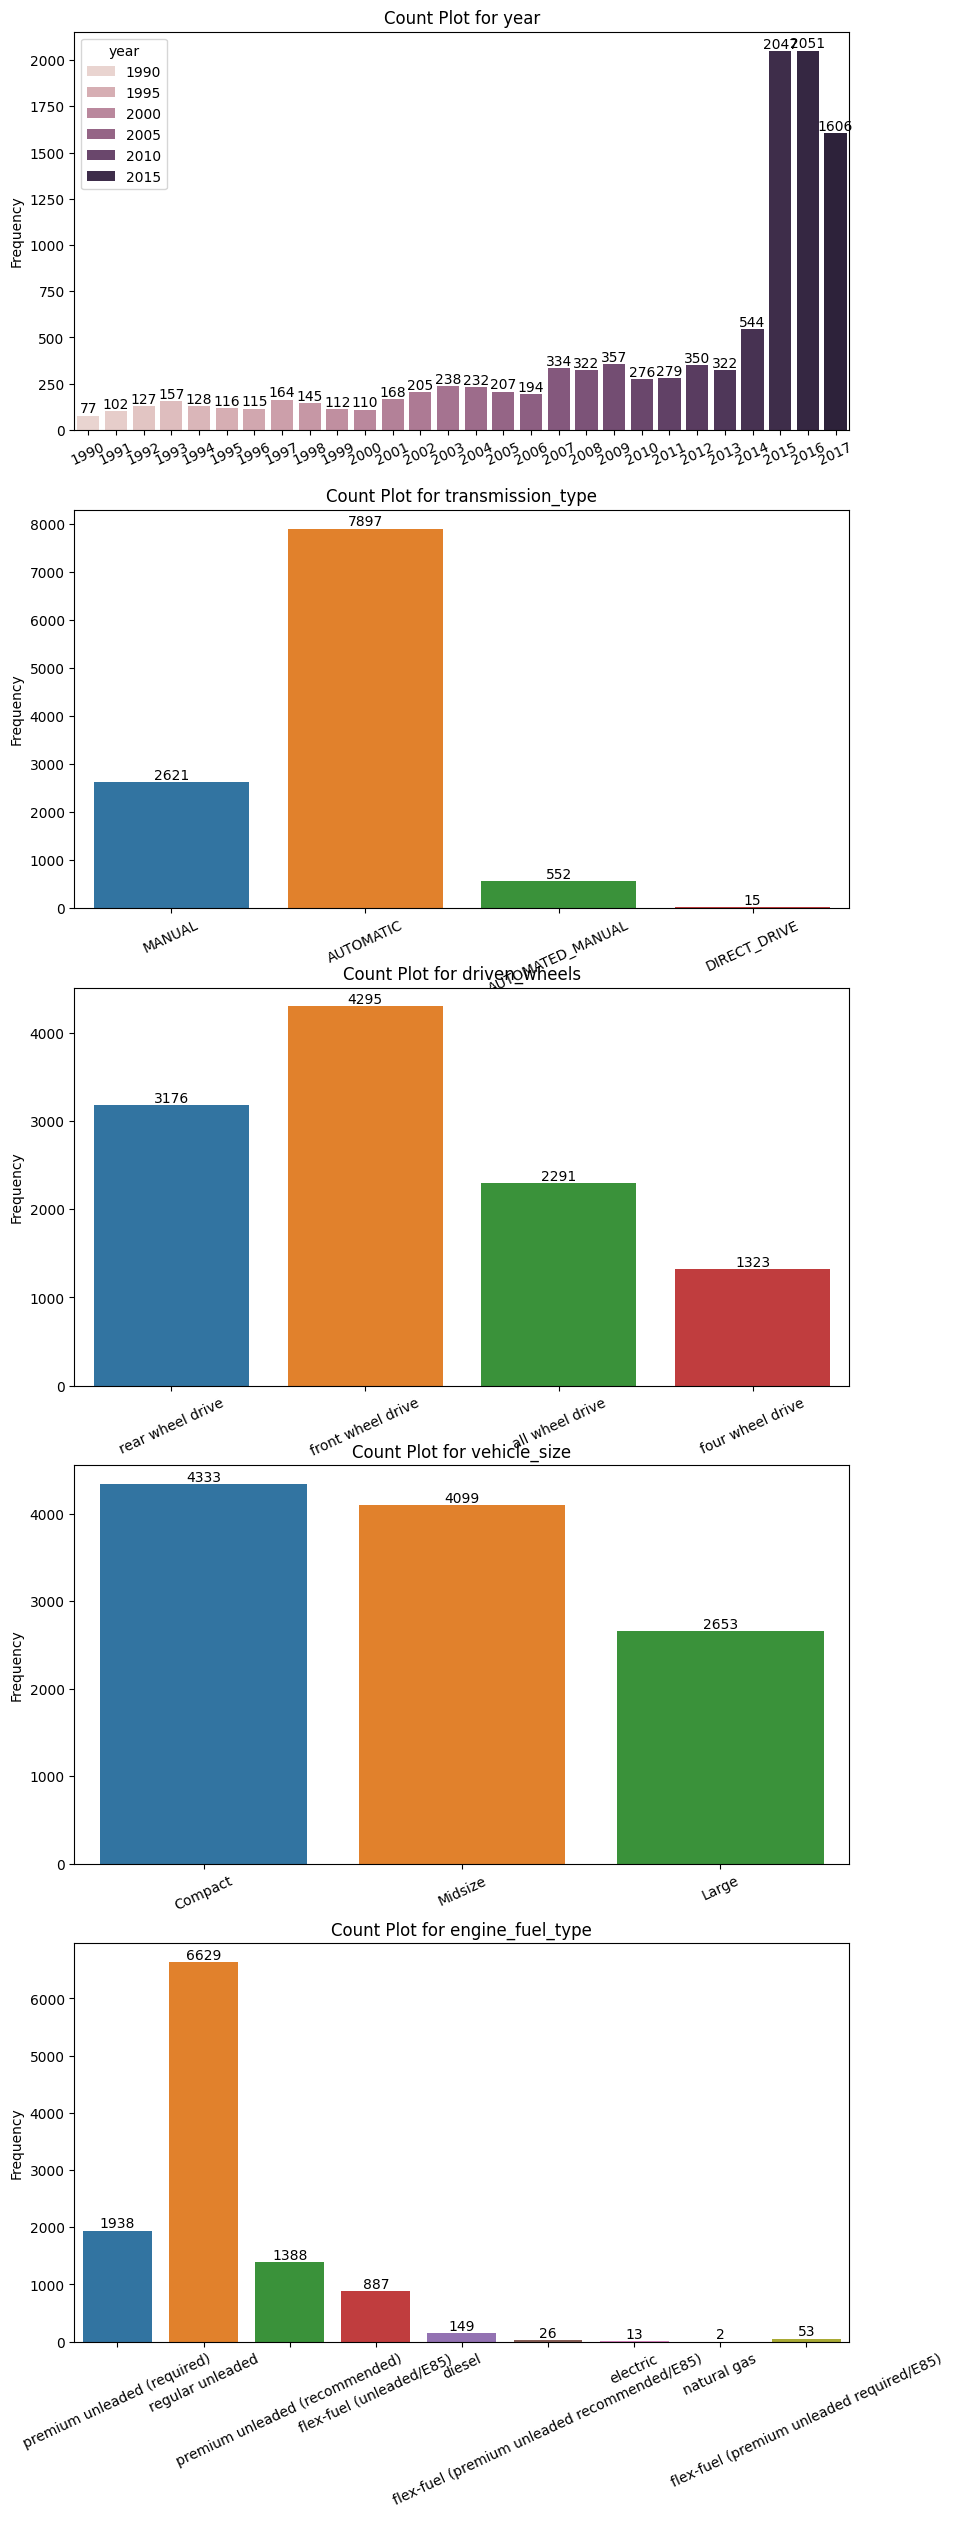

In [18]:
# Count selected object variable using for loop
cat_count = ['year', 'transmission_type', 'driven_wheels', 'vehicle_size', 'engine_fuel_type']
plt.figure(figsize = (10, 30))
i = 0 # iteration for subplots

for column in cat_count:
    i += 1
    plt.subplot(5, 1, i)
    ax = sns.countplot(data = car1, x = column, hue = column)
    plt.title(f'Count Plot for {column}')
    plt.ylabel('Frequency')
    plt.xlabel(' ')
    plt.xticks(rotation = 25)
    for container in ax.containers: # for loop to display the the count
        ax.bar_label(container)

plt.show()

# Feature Engineering

In [19]:
car1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11085 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   make               11085 non-null  object
 1   model              11085 non-null  object
 2   year               11085 non-null  object
 3   engine_fuel_type   11085 non-null  object
 4   engine_hp          11085 non-null  int64 
 5   engine_cylinders   11085 non-null  int64 
 6   transmission_type  11085 non-null  object
 7   driven_wheels      11085 non-null  object
 8   number_of_doors    11085 non-null  int64 
 9   market_category    11085 non-null  object
 10  vehicle_size       11085 non-null  object
 11  vehicle_style      11085 non-null  object
 12  highway_mpg        11085 non-null  int64 
 13  city_mpg           11085 non-null  int64 
 14  popularity         11085 non-null  int64 
 15  msrp               11085 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 1.4+ MB


## Building A Validation Framework / Splitting Dataset
- Training set 80 %
- Validation dataset 10%
- Test dataset 10%


In [20]:
df_train_full, df_test = train_test_split(car1, test_size=0.1, random_state=11)

df_train, df_valid = train_test_split(df_train_full, test_size=1/9, random_state=18) 

print(f'Training Dataset {df_train.shape}')
print(f'Validaton Dataset {df_valid.shape}')
print(f'Testing Dataset {df_test.shape}')

Training Dataset (8867, 16)
Validaton Dataset (1109, 16)
Testing Dataset (1109, 16)


In [21]:
## selecting target column and converting it to a vector format
y_train = np.log1p(df_train['msrp']).values
y_valid = np.log1p(df_valid['msrp']).values
y_test = np.log1p(df_test['msrp']).values
y_train_full = np.log1p(df_train_full['msrp']).values

In [22]:
# deleting the target column
del df_train['msrp']
del df_valid['msrp']
del df_test['msrp']
del df_train_full['msrp']

In [23]:
# confirming the deleting process
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
607,Ferrari,575M,2003,premium unleaded (required),515,12,MANUAL,rear wheel drive,2,"Exotic,High-Performance",Compact,Coupe,15,9,2774
7918,Infiniti,QX4,2003,premium unleaded (required),240,6,AUTOMATIC,four wheel drive,4,Luxury,Midsize,4dr SUV,18,14,190
5725,Toyota,Highlander Hybrid,2015,regular unleaded,280,6,AUTOMATIC,all wheel drive,4,"Crossover,Hybrid",Midsize,4dr SUV,28,27,2031
3022,Chevrolet,Corvette,2017,premium unleaded (required),650,8,MANUAL,rear wheel drive,2,"Factory Tuner,High-Performance",Compact,Convertible,22,15,1385
9228,Toyota,Sienna,2016,regular unleaded,266,6,AUTOMATIC,front wheel drive,4,Flex Fuel,Large,Passenger Minivan,25,18,2031


## Train A Baseline Regression Model
- Selecting baseline features (pandas dataframe)
    - engine_hp
    - engine_cylinders
    - highway_mpg
    - popularity
    - number_of_doors
- did not select city_mpg due its multicolinearity between highway_mpg
- convert dataframe to matrix/vector format
- Train a regression model

In [24]:

baseline_features = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'popularity','number_of_doors']

df_train_bl = df_train[baseline_features]
df_valid_bl = df_valid[baseline_features]

In [25]:
df_train_bl.head()

,engine_hp,engine_cylinders,highway_mpg,popularity,number_of_doors
607,515,12,15,2774,2
7918,240,6,18,190,4
5725,280,6,28,2031,4
3022,650,8,22,1385,2
9228,266,6,25,2031,4


In [26]:
# convert dataframes to pandas array 
X_train_bl = df_train_bl.values
X_train_bl

array([[ 515,   12,   15, 2774,    2],
       [ 240,    6,   18,  190,    4],
       [ 280,    6,   28, 2031,    4],
       ...,
       [ 148,    4,   32,  436,    4],
       [ 189,    4,   35, 2202,    4],
       [ 220,    4,   33,  873,    2]], shape=(8867, 5))

In [27]:
## lets train model 
model_be = LinearRegression() 
model_be.fit(X_train_bl, y_train)

LinearRegression()

## Model Evaluation
- Generate the validation features
- Compare the validation predictions to the actual predictions
- Return an accuracy score

In [28]:
# generate validation baseline features
X_valid_bl = df_valid_bl.values 
X_valid_bl

array([[ 318,    6,   27, 1624,    2],
       [ 335,    6,   32, 3916,    2],
       [ 275,    4,   31, 1385,    2],
       ...,
       [ 200,    6,   22,  204,    4],
       [ 300,    6,   30, 1385,    4],
       [ 280,    6,   27, 2202,    4]], shape=(1109, 5))

In [29]:
# generate our validation prediction
y_predict_baseline = model_be.predict(X_valid_bl)

print('Actual:', np.exp(y_valid[0:10]))
print('Predicted:', np.exp(y_predict_baseline[0:10]).round(2))

Actual: [40806. 49051. 26601. 36901. 49796. 23576.  2001.  2001. 62031.  2143.]
Predicted: [36476.95 46723.65 35313.17 32864.44 49294.87  9926.04 15104.12  7472.84
 49630.66  6397.96]


In [30]:
# Compute the baseline accuracy score
rmse_baseline = round(root_mean_squared_error(y_valid, y_predict_baseline), 2)
print(f'Baseline Root-Mean Squared Error (RMSE) is {rmse_baseline}. This means on average the model\'s prediction is off by {rmse_baseline}')

adjR2_baseline = round(r2_score(y_valid, y_predict_baseline), 2)
print(f'\nAdjusted R-squared score for the baseline features is {adjR2_baseline}. This means the model is able to predict {adjR2_baseline} of our dataset')

Baseline Root-Mean Squared Error (RMSE) is 0.72. This means on average the model's prediction is off by 0.72

Adjusted R-squared score for the baseline features is 0.58. This means the model is able to predict 0.58 of our dataset


# Feature Engineering
- Select features (both numerical and categorical)
- Convert categorical data to numerical using one-hot encoding (eg. DictVectorizer method)
- Train your model

In [31]:
# select features
numerical_features = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'popularity','number_of_doors']
categorical_features = ['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']

df_train_fe = df_train[numerical_features + categorical_features]
df_valid_fe = df_valid[numerical_features + categorical_features]

In [32]:
# confirming selection
df_train_fe.head()

,engine_hp,engine_cylinders,highway_mpg,popularity,number_of_doors,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
607,515,12,15,2774,2,Ferrari,575M,premium unleaded (required),MANUAL,rear wheel drive,"Exotic,High-Performance",Compact,Coupe
7918,240,6,18,190,4,Infiniti,QX4,premium unleaded (required),AUTOMATIC,four wheel drive,Luxury,Midsize,4dr SUV
5725,280,6,28,2031,4,Toyota,Highlander Hybrid,regular unleaded,AUTOMATIC,all wheel drive,"Crossover,Hybrid",Midsize,4dr SUV
3022,650,8,22,1385,2,Chevrolet,Corvette,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,High-Performance",Compact,Convertible
9228,266,6,25,2031,4,Toyota,Sienna,regular unleaded,AUTOMATIC,front wheel drive,Flex Fuel,Large,Passenger Minivan


In [33]:
# Convert categorical data to numerical using one-hot encoding
# convert our dataframe to a list of dict
train_dict_fe = df_train_fe.to_dict(orient='records')

# create an instance for the dict vectorizer
dv = DictVectorizer()
dv.fit(train_dict_fe)

# transform the resulting dictionary back into an array
X_train_fe = dv.transform(train_dict_fe)
X_train_fe

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 115271 stored elements and shape (8867, 1045)>

In [34]:
# Train the model using Linear Regression
model_fe = LinearRegression()
model_fe.fit(X_train_fe, y_train)

LinearRegression()

## Model Evaluation
- Generate the validation features
- Compare the validation predictions to the actual predictions
- Return an accuracy score

In [35]:
# Generate the validation features
valid_dict_fe = df_valid_fe.to_dict(orient= 'records')
X_valid_fe = dv.transform(valid_dict_fe)
X_valid_fe

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 14405 stored elements and shape (1109, 1045)>

In [36]:
# Compare the validation predictions to the actual predictions
y_predict_Regression = model_fe.predict(X_valid_fe)

print('Actual:', np.exp(y_valid[0:10]))
print('Predicted:', np.exp(y_predict_Regression[0:10]).round(2))

Actual: [40806. 49051. 26601. 36901. 49796. 23576.  2001.  2001. 62031.  2143.]
Predicted: [47193.65 43665.96 27852.92 30606.68 49034.26 19174.97  2349.11  1819.64
 56837.57  2378.39]


In [37]:
# Compute the accuracy score
rmse_fe = round(root_mean_squared_error(y_valid, y_predict_Regression), 2)
print(f'The Root-Mean Squared Error (RMSE) using Linear Regression is {rmse_fe * 100}%')

adjR2_fe = round(r2_score(y_valid, y_predict_Regression), 4)
print(f'\nThe Adjusted R-squared score using Linear Regression is {adjR2_fe * 100}%')


The Root-Mean Squared Error (RMSE) using Linear Regression is 24.0%

The Adjusted R-squared score using Linear Regression is 95.32000000000001%


# Using Random Forest Regressor

In [38]:
# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=18, n_jobs= -1)

# Train the model
random_forest.fit(X_train_fe, y_train)

RandomForestRegressor(n_jobs=-1, random_state=18)

In [39]:
# Compare the validation predictions to the actual predictions
y_predict_RandomForest = random_forest.predict(X_valid_fe)

print('Actual:', np.round(np.exp(y_valid[0:10]), 2))
print('Predicted:', np.round(np.exp(y_predict_RandomForest[0:10]), 2))

Actual: [40806. 49051. 26601. 36901. 49796. 23576.  2001.  2001. 62031.  2143.]
Predicted: [46381.49 49336.73 28725.86 33309.95 46905.41 20092.5   2327.38  2127.37
 53916.34  2382.09]


In [40]:
# Compute the accuracy score
rmse_fr = root_mean_squared_error(y_valid, y_predict_RandomForest)
print(f'The Root-Mean Squared Error (RMSE) using Random Forest is {rmse_fr:.2f}')

adjR2_fr = r2_score(y_valid, y_predict_RandomForest)
print(f'\nThe Adjusted R-squared score using Random Forest is {adjR2_fr:.4f}')

The Root-Mean Squared Error (RMSE) using Random Forest is 0.20

The Adjusted R-squared score using Random Forest is 0.9670


# Conclusion
Having tested the dataset through all the models, I have decided to use the Random Forest Regressor as my final model. While both Random Forest and Linear Regression achieved identical Adjusted R-squared scores, the Random Forest model demonstrated better performance by achieving a lower Root Mean Squared Error (RMSE) of 0.20 compared to Linear Regression's 0.24.

# Saving Model

In [41]:
import pickle

with open('car-price-model.bin', 'wb') as f_out:
    pickle.dump((dv, random_forest), f_out)

# Loading Model

In [42]:
with open('car-price-model.bin', 'rb') as f_in:
    dv, model = pickle.load(f_in)

In [43]:
# sample data
test_1 = {'make': 'Honda',
  'model': 'Insight',
  'year': 2014,
  'engine_fuel_type': 'regular unleaded',
  'engine_hp': 98,
  'engine_cylinders': 4,
  'transmission_type': 'AUTOMATIC',
  'driven_wheels': 'front wheel drive',
  'number_of_doors': 4,
  'market_category': 'Hatchback,Hybrid',
  'vehicle_size': 'Compact',
  'vehicle_style': '4dr Hatchback',
  'highway_mpg': 44,
  'city_mpg': 41,
  'popularity': 2202}

test_4 = {'make': 'Maybach',
  'model': '62',
  'year': 2010,
  'engine_fuel_type': 'premium unleaded (required)',
  'engine_hp': 631,
  'engine_cylinders': 12,
  'transmission_type': 'AUTOMATIC',
  'driven_wheels': 'rear wheel drive',
  'number_of_doors': 4,
  'market_category': 'Exotic,Luxury,High-Performance',
  'vehicle_size': 'Large',
  'vehicle_style': 'Sedan',
  'highway_mpg': 16,
  'city_mpg': 10,
  'popularity': 67}

test_0 = {'make': 'GMC',
  'model': 'Jimmy',
  'year': 1999,
  'engine_fuel_type': 'regular unleaded',
  'engine_hp': 190,
  'engine_cylinders': 6,
  'transmission_type': 'AUTOMATIC',
  'driven_wheels': 'four wheel drive',
  'number_of_doors': 4,
  'market_category': 'Crossover',
  'vehicle_size': 'Midsize',
  'vehicle_style': '4dr SUV',
  'highway_mpg': 19,
  'city_mpg': 14,
  'popularity': 549}

In [44]:
# create a function to make a single prediction
def predict_price(car_data, dv, model):
    X = dv.transform([car_data])
    y_predict = model.predict(X)
    return y_predict[0]

In [45]:
# testing time
predict1 = predict_price(test_0, dv, model)

print(f'Actual Price: ${round(np.exp(y_test[0]), 2)}')
print(f'Predicted Price: ${round(np.exp(predict1), 2)}')

Actual Price: $2692.0
Predicted Price: $2874.01


In [46]:
predict2 = predict_price(test_1, dv, model)

print(f'Actual Price: ${round(np.exp(y_test[1]), 2)}')
print(f'Predicted Price: ${round(np.exp(predict2), 2)}')

Actual Price: $22191.0
Predicted Price: $20917.69


In [47]:
predict3 = predict_price(test_4, dv, model)

print(f'Actual Price: ${round(np.exp(y_test[4]), 2)}')
print(f'Predicted Price: ${round(np.exp(predict3), 2)}')

Actual Price: $506501.0
Predicted Price: $442501.18
